#  Banknote_authentication 

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np 
import pandas as pd
import models as m
from model_selection import *
import seaborn as sns

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Processing(path):
    """

    Clean the data by replacing the na_values by the mean 
    of the associated column. Take the path as argument.
    """
    data = pd.read_csv(path, na_values='?')
    for i in data.columns:
        for j in data[i]:
            if(isinstance(j,str)):
                l = [x for x in data[i].unique() if str(x) != 'nan']
                le = LabelEncoder()
                le.fit(l)
                y = le.transform(l)
                for k in range(len(l)):
                    data[i].replace(l[k],y[k], inplace = True)
    data.fillna(round(data.mean(), 2), inplace=True)
    data.to_csv("test.csv", sep=',', index=False)

Processing('data/data_banknote_authentication.txt')

data = pd.read_csv('test.csv',sep=',', names = ["variance","skewness", "curtosis", "entropy", "Class" ])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [24]:
data.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
data.describe()

,variance,skewness,curtosis,entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


For the sake of visualisation let's look at the class distribution of some  numerical features. 

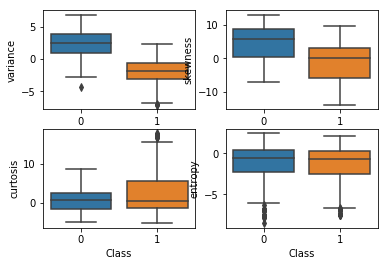

In [27]:
plt.subplot(221)
sns.boxplot(x = "Class", y = "variance",data=data)
plt.subplot(222)
sns.boxplot(x = "Class", y = "skewness",data=data)
plt.subplot(223)
sns.boxplot(x = "Class", y = "curtosis",data=data)
plt.subplot(224)
sns.boxplot(x = "Class", y = "entropy",data=data)


Number of components to explain 90% of the variance: 2


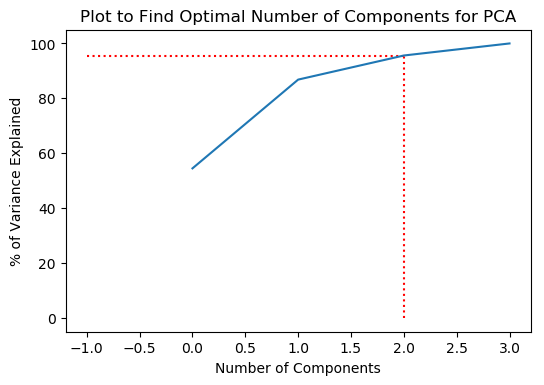

In [29]:
def PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
    plt.figure(dpi=100)
    plt.xlabel('Number of Components')
    plt.ylabel('% of Variance Explained')
    plt.title('Plot to Find Optimal Number of Components for PCA')
    plt.plot(var)
    c = np.where(var > 90)[0][0]
    y = var[c]
    plt.hlines(y = y,xmin=  -1, xmax= c, colors = "r", linestyles= 'dotted')
    plt.vlines(x = c,ymin=  0, ymax= y, colors = "r", linestyles= 'dotted')


    print("Number of components to explain 90% of the variance:",c)
    return pca

N=len(data.columns)
X = data.values[:,0:N-1]
pca=PCA(X,N)

**Remarque**: As can be seen, the first two components capture nearly 90% of the variance of the data.. The figure below shows a 2d representation of the data using the  first two principal components. This yields important insights on data separability, in the linear case for instance. 

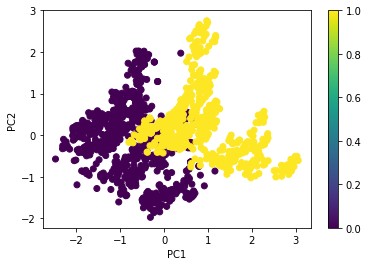

In [31]:
def plot_PCA(Y,Nb):
    std_scale = preprocessing.StandardScaler().fit(Y)
    Y_scaled = std_scale.transform(Y)
    pca = decomposition.PCA(n_components=Nb-1)
    pca.fit(Y_scaled)
    Y_projected = pca.transform(Y_scaled)
    plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=data.get("Class"))
    plt.colorbar()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
plot_PCA(data.values[:,0:2],3)

In [33]:

pca_new=decomposition.PCA(n_components=2)
pca_new.fit(X)
x_new=pca_new.transform(X)
classe=data.get(data.columns[-1])
x_new_df=pd.DataFrame(x_new,columns=['V1','V2'])
y_new_df=pd.DataFrame(classe,columns=['Class'])
final_data=pd.concat([x_new_df,y_new_df],axis=1)

final_data
N=len(x_new_df.columns)

## Data preparation 

In [34]:
path = 'test.csv'
#target_name = 'target'
test_size= 0.3

In [35]:
df, X, y, X_train, X_test, y_train, y_test = load_data(path, test_size = test_size)


X_train : (959, 4)  y_train : (959,) X_test :  (412, 4) y test :  (412,)


In [50]:
#from sklearn.preprocessing import label_binarize

#y_train = label_binarize(y_train, classes = ['ckd', 'notckd'])
#y_test = label_binarize(y_test, classes = ['ckd', 'notckd'])

## Decision tree classification 

Let's first train a decision tree classifier with default parameters and evaluate it's preformance.

In [37]:
Decision_clf = m.DecisionTreeModel( train = True, X_train= X_train, y_train = y_train)

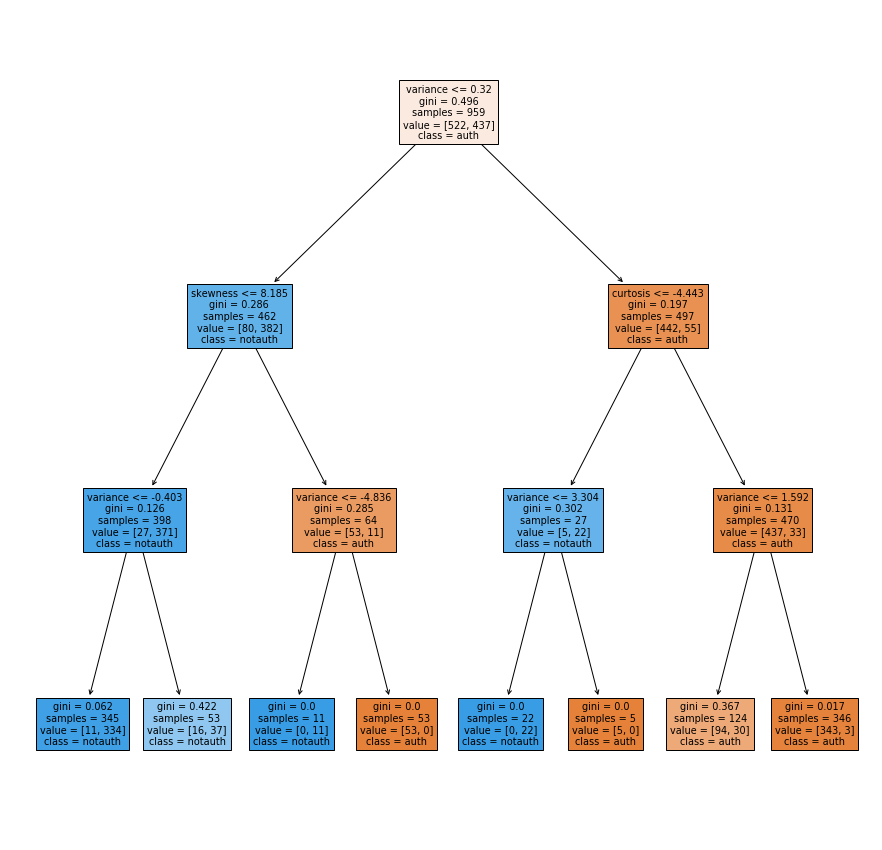

In [40]:
from sklearn import tree
plt.figure(figsize=(15, 15))

a = tree.plot_tree(Decision_clf, feature_names= data.columns[:-1], class_names= ['auth', 'notauth'], filled=True) 
plt.show()

## Cross validation

Instead of using a train/validation split, we will evaluate performance using a **cross-validation** with 10 folds. Then, the fine-tuned model will be applied on the test set in order to to compare its  performance to other models. 

In [41]:
results = cross_validation(Decision_clf, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.9358140272929228


## Prediction and performance

In [42]:
y_pred = m.predict(Decision_clf, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[219  20]
 [ 14 159]]
Accuracy :  91.74757281553399
Report : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       239
           1       0.89      0.92      0.90       173

    accuracy                           0.92       412
   macro avg       0.91      0.92      0.92       412
weighted avg       0.92      0.92      0.92       412



## Parameter tuning 

Here we will finetune this model using a grid search over a defined space of hyperparametres . The `search_pipeline` function uses the same cross_validation as before **on the training** set in order to find the best hyperparametre.

In [43]:
model = m.DecisionTreeModel( train = False)

In [61]:
param_grid = {'criterion': ['gini', 'entropy'],  
              'max_depth' : range(1,10),
              'min_samples_leaf': range(1,10) } 

In [62]:
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

In [63]:
fitted_model

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                        

In [65]:
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)

les meilleurs paramètres sont  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}
les meilleur score est  0.9822807017543861
Confusion Matrix: 
 [[238   1]
 [  2 171]]
Accuracy :  99.27184466019418
Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       239
           1       0.99      0.99      0.99       173

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



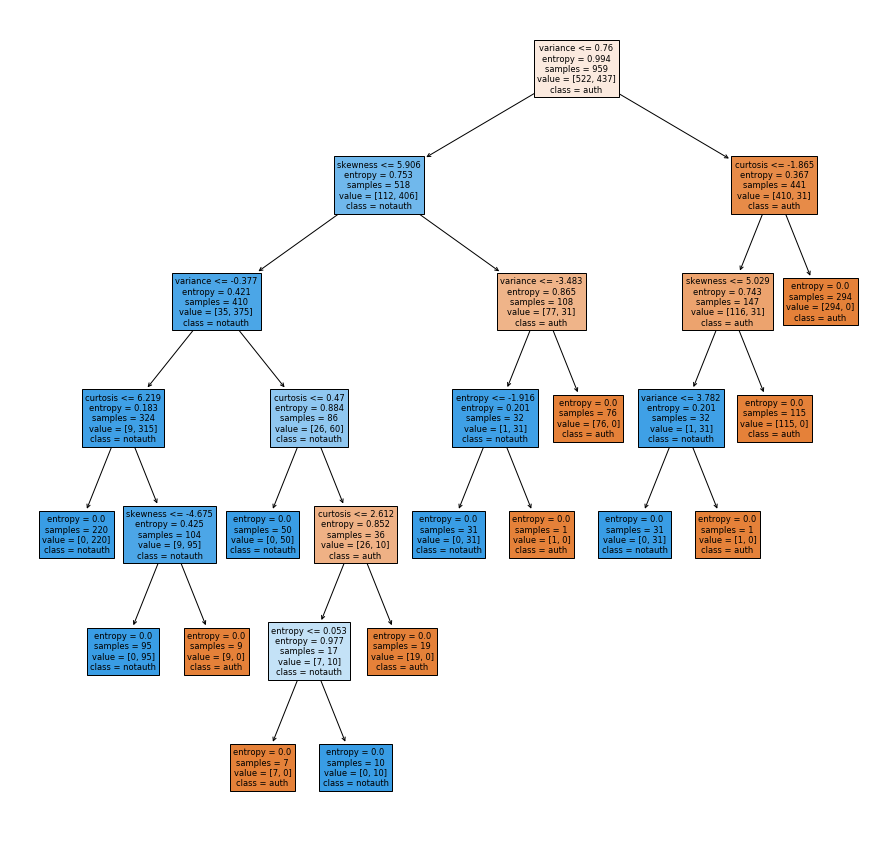

In [68]:
from sklearn import tree
plt.figure(figsize=(15, 15))
Decision_clf = m.DecisionTreeModel( train = True, X_train= X_train, y_train = y_train, **best_parameters)
a = tree.plot_tree(Decision_clf, feature_names= data.columns[:-1], class_names= ['auth', 'notauth'], filled=True) 
plt.show()

# SVM

In [71]:
data_train = X_train, y_train
model = m.SVM( train = True, X_train= X_train, y_train = y_train, gamma= 'auto')

In [72]:
results = cross_validation(model, X_train,y_train,epochs=100, batch_size=70, n_splits=10);

avg accuracy : 1.0


No handles with labels found to put in legend.


Confusion Matrix: 
 [[239   0]
 [  0 173]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       173

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



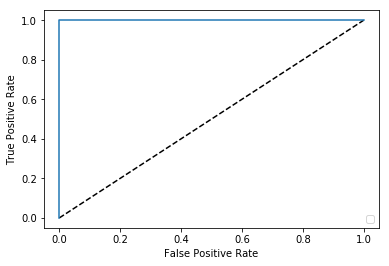

In [73]:
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred>0.5);
plot_roc(y_test,y_pred>0.5);

No handles with labels found to put in legend.


les meilleurs paramètres sont  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
les meilleur score est  0.8107142857142857
Confusion Matrix: 
 [[73  8]
 [10 29]]
Accuracy :  85.0
Report : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        81
           1       0.78      0.74      0.76        39

    accuracy                           0.85       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120



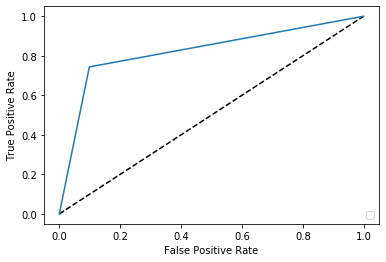

In [21]:
# defining parameter range 
model = m.SVM(train = False)
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000],  
              'gamma': [1, 0.1, 0.01,0.05, 0.001, 0.0001],
              'kernel': ['rbf']}  
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )

best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)
plot_roc(y_test,y_pred>0.5)


# Random Forest

In [22]:
data_train = X_train, y_train
model = m.RandomForest(max_depth = 2, train = True, X_train= X_train, y_train = y_train)
y_pred = m.predict(model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[78  3]
 [ 1 38]]
Accuracy :  96.66666666666667
Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        81
           1       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [23]:
results = cross_validation(model, X,y,epochs=100, batch_size=70, n_splits=10)

avg accuracy : 0.97


In [24]:
model = m.RandomForest(train = False)
param_grid = {'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'random_state':[42]}
  
    

gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, model, param_grid ,scoring_fit = 'accuracy' )
best_parameters = get_best_parameters (gs )
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred>0.5)


les meilleurs paramètres sont  {'max_depth': 6, 'n_estimators': 11, 'random_state': 42}
les meilleur score est  0.9928571428571429
Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



C:\Users\faull\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Neural Networks 

## Improved Multilayer perceptron

In [74]:
input_shape = X_train.shape[1]
MLP = m.build_MLP(input_shape = (input_shape,))
history = m.train(MLP,X_train, y_train, X_test, y_test, epochs = 5)

Test accuracy: 1.0


In [86]:
help(cross_validation)

Help on function cross_validation in module model_selection:

cross_validation(model, X, Y, epochs=100, batch_size=70, n_splits=10, **kwargs)
    take a keras or sklearn model and perform cross validation.
    
    Parameteres:
    ___________
    model : keras.engine.sequential.Sequential or sklearn model
        the model upon which the cross validation is performes.
    X, y : np array
        correspond respectively to input and output data. 
    
    
    
    Author : Amine



In [75]:
cross_validation( m.build_MLP(input_shape = (input_shape,)), X_train,y_train,epochs = 5, n_splits=10)

Using Keras classifier
avg accuracy : 0.9874999940395355


array([0.96875   , 0.98958331, 0.9375    , 1.        , 0.98958331,
       1.        , 1.        , 1.        , 0.98958331, 1.        ])

In [76]:
y_pred = m.predict(MLP, X_test)
accuracy(y_test, (y_pred>0.5).astype(float))

Confusion Matrix: 
 [[239   0]
 [  0 173]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       173

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [93]:
param_grid = {
              
              'batch_size':[ 70, 50, 60, 40],
              'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam'],
              #'dropout_rate' :        [0.1, 0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

In [95]:
help(search_pipeline)

Help on function search_pipeline in module model_selection:

search_pipeline(X_train_data, X_test_data, y_train_data, model, param_grid, cv=10, scoring_fit='neg_mean_squared_error', do_probabilities=False, search_mode='GridSearchCV', n_iterations=0)
    Parameters tuning for sklearn and keras models. . 
    Made by Louis and Amine



In [97]:
MLP = m.build_MLP(input_shape = (input_shape,))
gs, fitted_model, pred = search_pipeline(X_train, X_test, y_train, MLP, 
                                         param_grid ,scoring_fit = 'accuracy'
                                        )

In [99]:
best_parameters = get_best_parameters (gs )
cross_validation( m.build_MLP((4,)), X_train,y_train, n_splits=3, **best_parameters)

les meilleurs paramètres sont  {'batch_size': 70, 'epochs': 100}
les meilleur score est  1.0
Using Keras classifier
avg accuracy : nan


array([nan, nan, nan])

In [100]:
y_pred = m.predict(fitted_model, X_test)
accuracy(y_test, y_pred)

Confusion Matrix: 
 [[81  0]
 [ 0 39]]
Accuracy :  100.0
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

